In [1]:
# Question 2
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data
data_1=pd.read_csv('E:\\download\\Salary_Data.csv')
data_1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data_1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

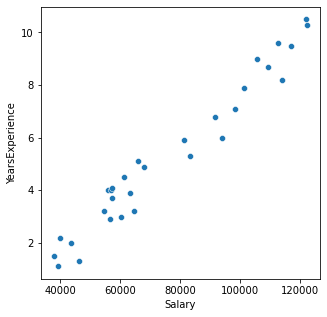

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'Salary',y = 'YearsExperience',data = data_1 )

In [6]:
# corelation of the data
data_1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

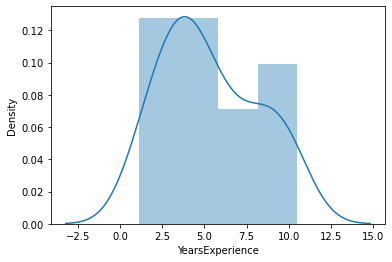

In [7]:
# checking the skewness of the data
sns.distplot(data_1['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

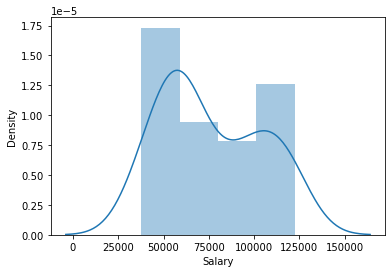

In [8]:
sns.distplot(data_1['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

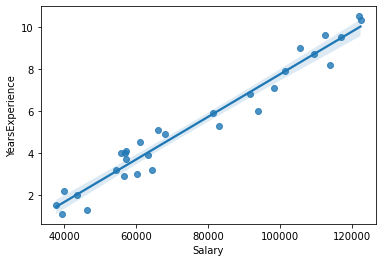

In [9]:
sns.regplot(x = 'Salary',y = 'YearsExperience',data = data_1)

Transformations of the data:

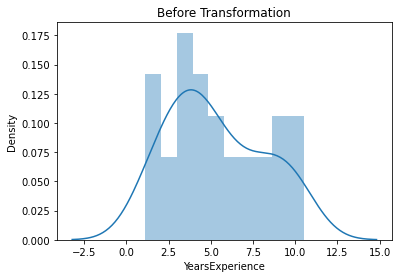

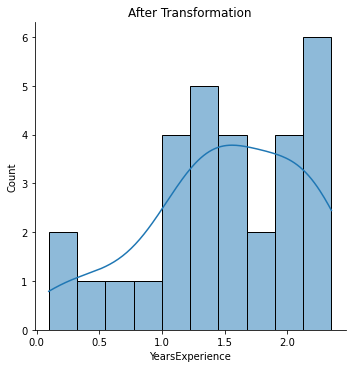

In [10]:

sns.distplot(data_1['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data_1['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

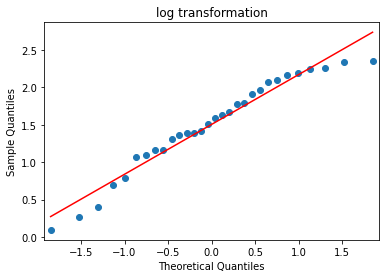

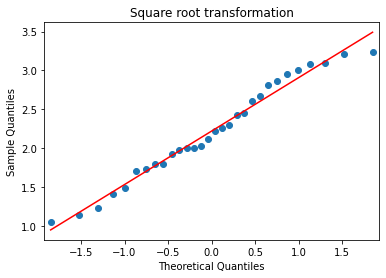

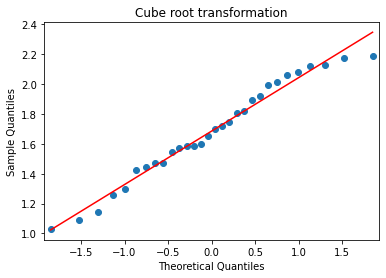

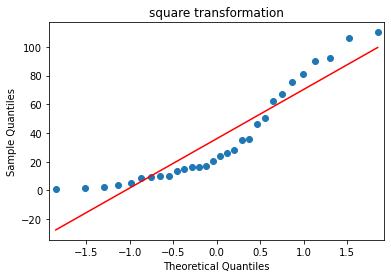

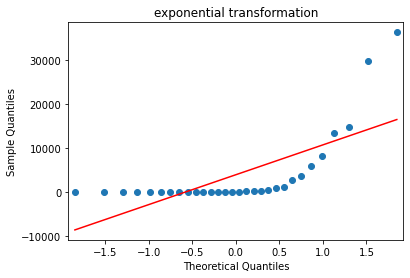

In [11]:
import statsmodels.api as smf
smf.qqplot(np.log(data_1['YearsExperience']), line = 'r')
plt.title('log transformation')
smf.qqplot(np.sqrt(data_1['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data_1['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.square(data_1['YearsExperience']), line = 'r')
plt.title('square transformation')
smf.qqplot(np.exp(data_1['YearsExperience']), line = 'r')
plt.title('exponential transformation')
plt.show()



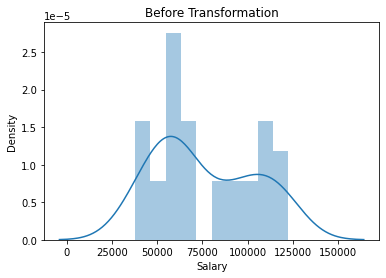

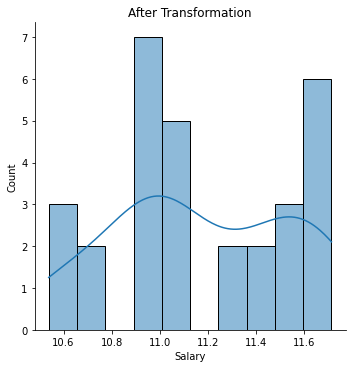

In [12]:
sns.distplot(data_1['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data_1['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

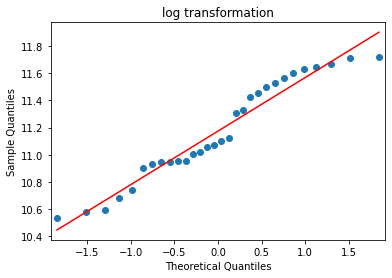

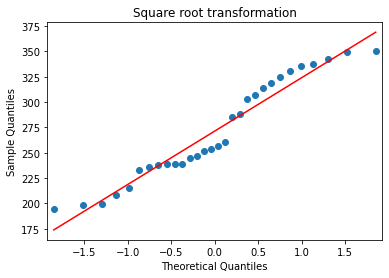

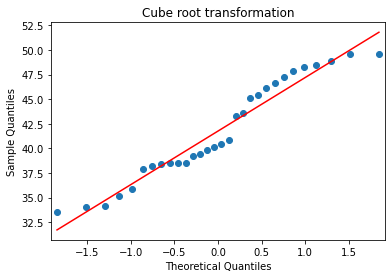

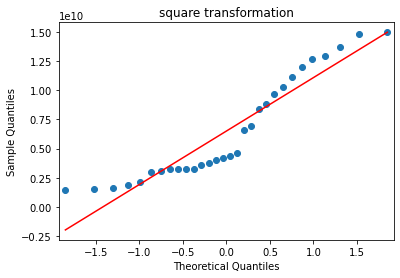

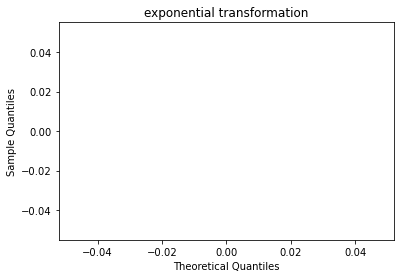

In [13]:
import statsmodels.api as smf
smf.qqplot(np.log(data_1['Salary']), line = 'r')
plt.title('log transformation')
smf.qqplot(np.sqrt(data_1['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data_1['Salary']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.square(data_1['Salary']), line = 'r')
plt.title('square transformation')
smf.qqplot(np.exp(data_1['Salary']), line = 'r')
plt.title('exponential transformation')
plt.show()


Linear Regression model

In [14]:
# Using Ordinary least squares (OLS) regression
import statsmodels.formula.api as smf
model_1 = smf.ols('Salary~YearsExperience',data = data_1).fit()

In [15]:
# Square Root transformation on data
model_2 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data_1).fit()

Testing the data:

In [16]:
# findig the model parameters
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
model_2.params

Intercept                   103.568031
np.sqrt(YearsExperience)     75.626932
dtype: float64

Prediction of the data:

In [18]:
data_1.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
# manual prediction
Salary  = (25792.200199) + (9449.962321*1.1)
Salary

36187.158752100004

In [21]:
# Automated prediction
model_1.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Prediction of error:

In [22]:
data_1['Predicted']=model_1.fittedvalues
data_1[0:5]

,YearsExperience,Salary,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [23]:
data_1['error'] = model_1.resid
data_1[0:5]

,YearsExperience,Salary,Predicted,error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [24]:
data_1['error_1'] = data_1['Salary']-data_1['Predicted']
data_1[0:5]

,YearsExperience,Salary,Predicted,error,error_1
0,1.1,39343.0,36187.158752,3155.841248,3155.841248
1,1.3,46205.0,38077.151217,8127.848783,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306,-6691.117306


In [25]:
data_1['error_sq'] = (data_1['error'])**2
data_1[0:5]

,YearsExperience,Salary,Predicted,error,error_1,error_sq
0,1.1,39343.0,36187.158752,3155.841248,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,-6691.117306,4.477105e+07


In [26]:
Mean_Squared_Error = data_1['error_sq'].mean()
Mean_Squared_Error

31270951.722280964

In [28]:
model_2.rsquared

0.9419490138976825

95.69% of variation in Salary is seen by the given experience data

In [29]:
model_2.pvalues[1]

7.5843260978569935e-19

p value is less than 0.05

# Question 1

In [30]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# importing the data
data_2=pd.read_csv('E:\\download\\delivery_time.csv')
data_2

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [32]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [33]:
# corelation of the data
data_2.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

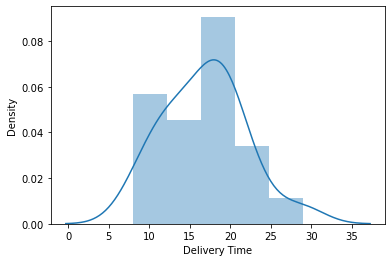

In [34]:
# checking the skewness of the data
sns.distplot(data_2['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

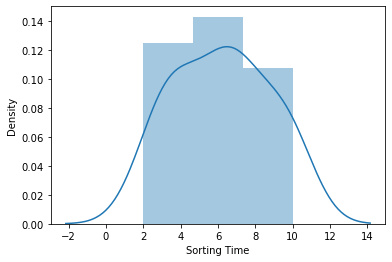

In [35]:
sns.distplot(data_2['Sorting Time'])

Linear Regression Model:

In [36]:
import statsmodels.formula.api as smf


In [37]:
# Renaming Columns
data_2=data_2.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
data_2

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

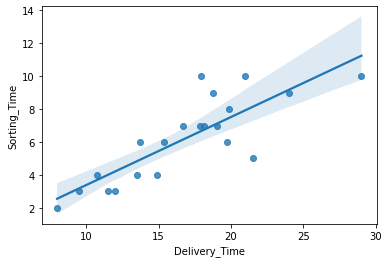

In [38]:
sns.regplot(x = 'Delivery_Time',y = 'Sorting_Time',data = data_2)

Transformation of the data

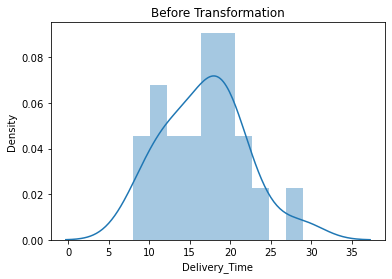

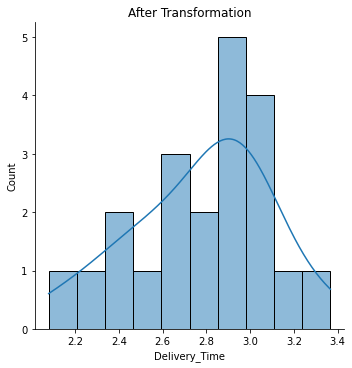

In [39]:
sns.distplot(data_2['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data_2['Delivery_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

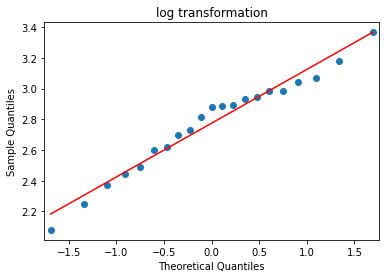

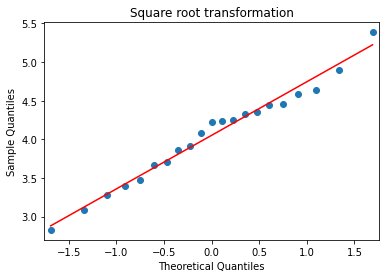

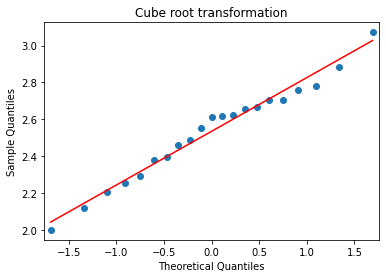

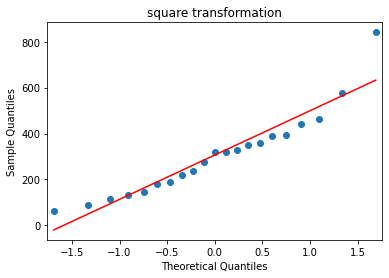

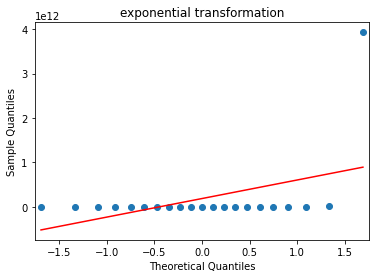

In [40]:
import statsmodels.api as smf
smf.qqplot(np.log(data_2['Delivery_Time']), line = 'r')
plt.title('log transformation')
smf.qqplot(np.sqrt(data_2['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data_2['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.square(data_2['Delivery_Time']), line = 'r')
plt.title('square transformation')
smf.qqplot(np.exp(data_2['Delivery_Time']), line = 'r')
plt.title('exponential transformation')
plt.show()



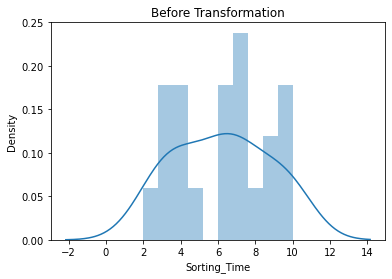

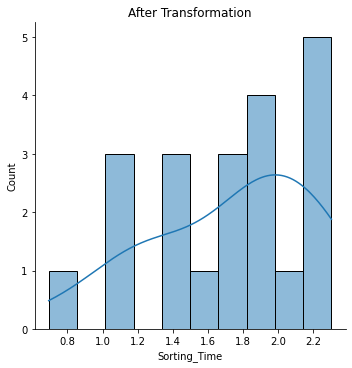

In [41]:
sns.distplot(data_2['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data_2['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

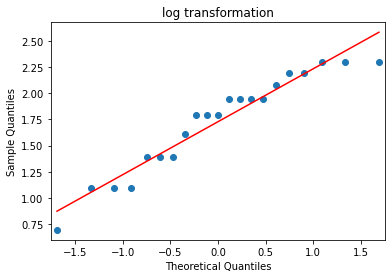

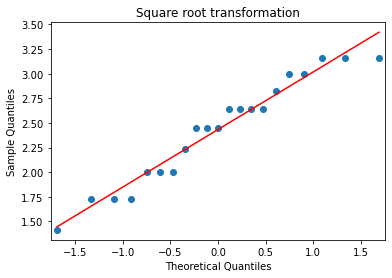

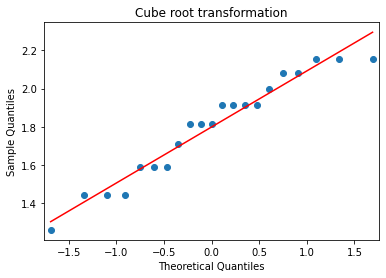

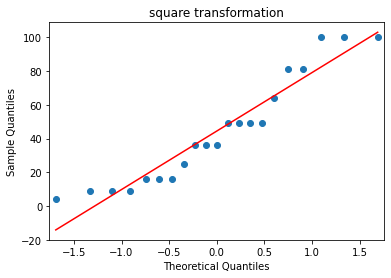

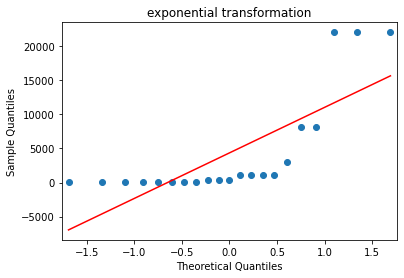

In [42]:
import statsmodels.api as smf
smf.qqplot(np.log(data_2['Sorting_Time']), line = 'r')
plt.title('log transformation')
smf.qqplot(np.sqrt(data_2['Sorting_Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data_2['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.square(data_2['Sorting_Time']), line = 'r')
plt.title('square transformation')
smf.qqplot(np.exp(data_2['Sorting_Time']), line = 'r')
plt.title('exponential transformation')
plt.show()



 Linear Regression Model

In [43]:
# Using Ordinary least squares (OLS) regression
import statsmodels.formula.api as smf
model_3 = smf.ols('Delivery_Time~Sorting_Time',data = data_2).fit()

In [44]:
# Using Square Root regression
model_4 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = data_2).fit()

Testing the data:

In [45]:
# Finding the model parameters
model_3.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [46]:
# manual prediction
Sorting_Time = (6.582734) + (1.649020*10)
Sorting_Time

23.072933999999997

In [47]:
# Automated prediction
model_3.fittedvalues


0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Prediction of error:

In [48]:
data_2['Parameter_1']=model_3.fittedvalues
data_2

,Delivery_Time,Sorting_Time,Parameter_1
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [50]:
data_2['error']=model_3.resid
data_2[0:5]

,Delivery_Time,Sorting_Time,Parameter_1,error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


In [51]:
data_2['error_sq']=(data_2['error'])**2
data_2[0:5]

,Delivery_Time,Sorting_Time,Parameter_1,error,error_sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124


In [52]:
Mean_Squared_Error = data_2['error_sq'].mean()
Mean_Squared_Error

7.793311548584063

In [53]:
model_3.rsquared

0.6822714748417231

In [54]:
model_3.pvalues[1]

3.983049566687813e-06

p value is less than 0.05